# Sliding Window (Fixed Size)

The idea behind having a fixed sliding window is to maintain two pointers that are k apart from each other and fit a certain constraint.

> Q: Given an array, return true if there are two elements within a window of size `k` that are equal.


### Brute Force Method

Run 2 for loops over the first and second index, and return true if there's duplicates.  Using the brute-force approach, our outer loop will loop $n$ times and the inner loop will run $k$ times from 1 to `k`, where k <= n. Meaning that in the worst case, we end up with quadratic time complexity, $O(n^2)$

E.g. with the array `[1,2,3,2,3,3]` with `k=3`

```python
def closeDuplicatesBruteForce(nums, k):
    for L in range(len(nums)):
        #will run k times from L+1 until L+k-1
        for R in range(L + 1, min(len(nums), L + k)):
            if nums[L] == nums[R]:
                return True
    return False
```

### Sliding Window (Fixed Size)

We maintain a window of size k and within our window, we must have two duplicates. Sets allow us to store unique elements and have an $O(1)$ lookup, removal and add complexity. We can use a set to denote the unique elements in our window and add elements from the right. When window size goes beyond k, we can remove elements from the left to maintain our window size.

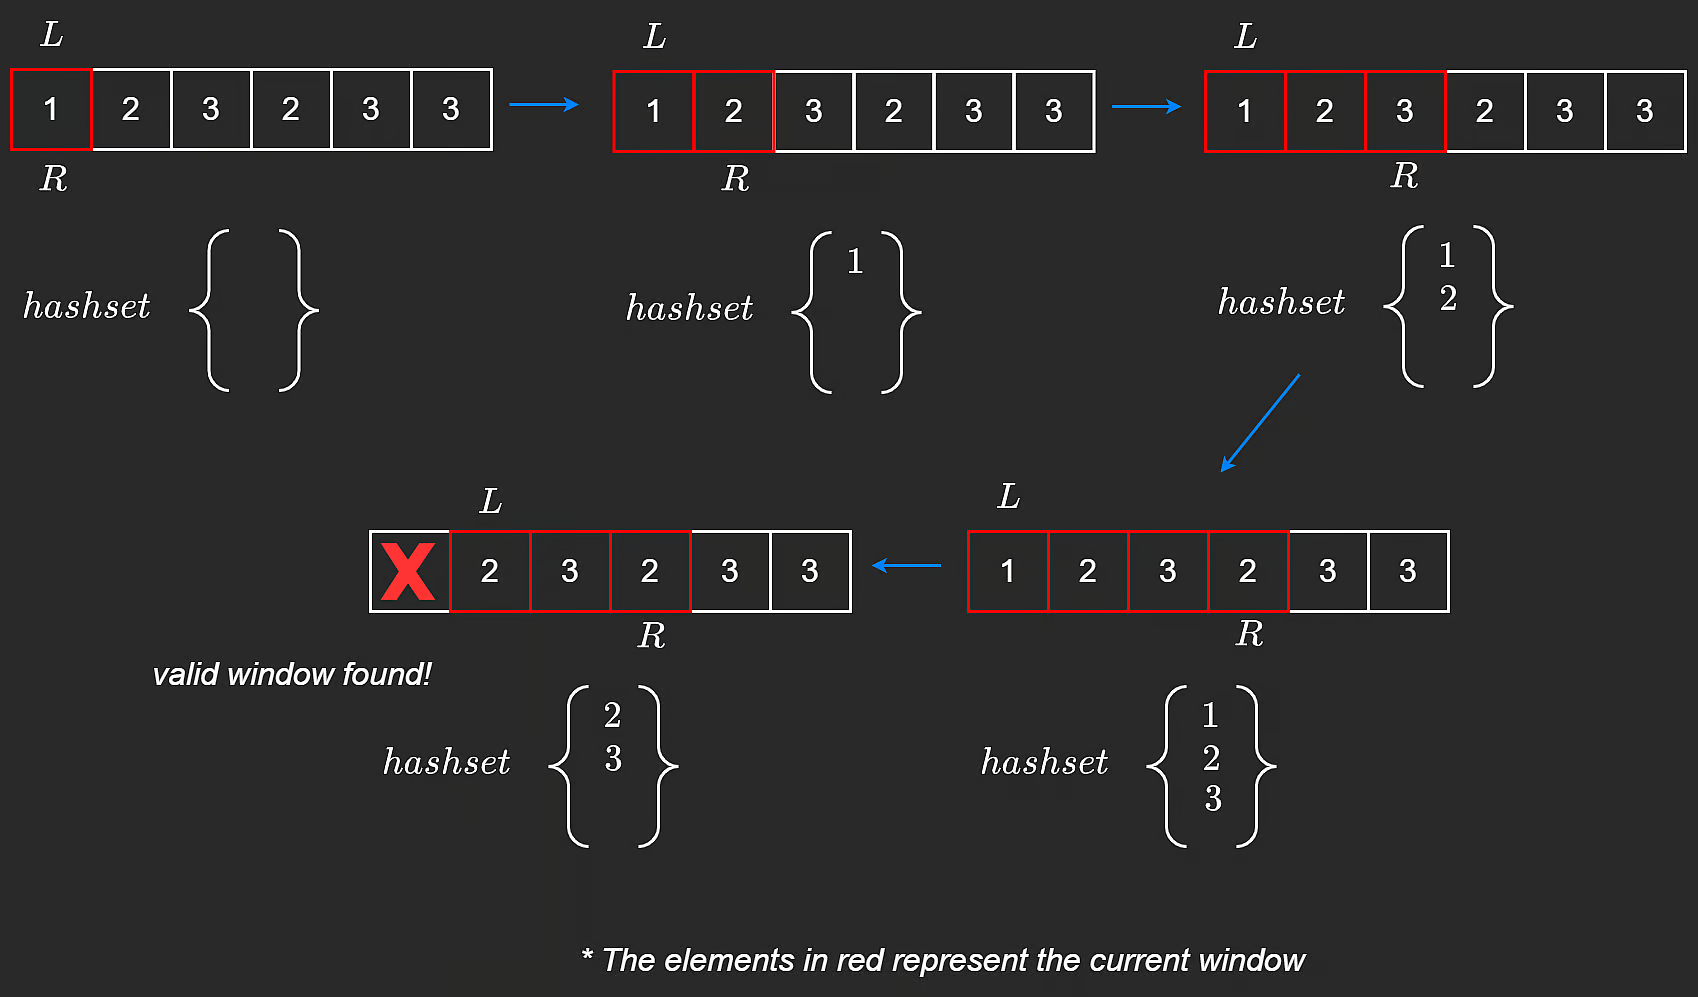

```python
def closeDuplicates(nums, k):
    #set basically tracks all the items in the current window
    #the window will have all distinct elems anyway, so sets will be good to track
    window = set() # Cur window of size <= k
    L = 0

    for R in range(len(nums)):
        #if window size exceeds, first trim to make it a valid window
        if R - L + 1 > k:
            #first remove the last element
            window.remove(nums[L])
            L += 1
        #if the next elem in this set, immediately return true and break out of function
        if nums[R] in window:
            return True
        #add this distinct element and continue adding to R
        window.add(nums[R])

    return False
```

---

## Time Complexity

We bring the time complexity down from $O(n^2)$ down to $O(n)$ because we only perform a single pass on the array and our hashset allows us to have $O(1)$ lookup.

The space complexity is $O(k)$, the size of our sliding window.

## Problem: Number of Sub-arrays with Average Greater/Equal to Threshold

https://leetcode.com/problems/number-of-sub-arrays-of-size-k-and-average-greater-than-or-equal-to-threshold/description/

In [9]:
#mysol
def numOfSubarrays( arr, k, threshold) -> int:
    #L and R are inclusive left/right indexes of the subarray
    L,R=0,k-1
    currsum=sum(arr[0:k])
    count=0

    while R<len(arr):
        #at the start, this is the correct R and L, sum
        print(L,R,currsum)
        if currsum>=threshold*k:
            count+=1

        if R!=len(arr)-1:
            #prep next iteration

            #remove the old arr[L]
            currsum-=arr[L]
            #add the next elem
            currsum+=arr[R+1]

        #update
        R+=1
        L+=1
    
    return count

In [10]:
#neetcode solution, cleaner because they started off the sum pre-update
def numOfSubarrays(arr, k, threshold) -> int:
    res = 0
    #stop short of the before update, this is the sum pre-update smart!
    curSum = sum(arr[:k-1])

    #basically slide all windows of size k
    for L in range(len(arr) - k + 1):
        curSum += arr[L + k - 1]
        #at this point, this is the current window
        if (curSum / k) >= threshold:
            res += 1
        curSum -= arr[L]
    return res

In [11]:
print(numOfSubarrays(arr = [2,2,2,2,5,5,5,8], k = 3, threshold = 4))

3
